In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import openpyxl as op
from numpy.lib.shape_base import column_stack
from scipy.stats import skew
from statistics import mean
from statistics import stdev
import os 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from tensorflow.python.keras.combinations import times

In [2]:
df = pd.read_excel('bank_churn.xlsx')
df.sample(5) 

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2315,714840858,Existing Customer,40,F,3,High School,Unknown,Less than $40K,Blue,31,...,2,4,2222.0,1551,671.0,0.932,3302,65,0.585,0.698
3296,807137808,Existing Customer,45,M,3,High School,Divorced,$60K - $80K,Blue,40,...,1,2,17576.0,0,17576.0,0.667,3494,67,0.718,0.000
9446,714794133,Existing Customer,54,M,2,Uneducated,Married,$60K - $80K,Blue,45,...,3,1,6546.0,1908,4638.0,0.697,14103,112,0.672,0.291
3202,808753758,Existing Customer,52,M,2,Uneducated,Divorced,$120K +,Blue,47,...,2,2,29695.0,1525,28170.0,0.529,4109,71,0.614,0.051
8770,710357208,Existing Customer,49,M,4,Uneducated,Married,$80K - $120K,Blue,39,...,3,2,8561.0,915,7646.0,0.637,7341,79,0.491,0.107


In [3]:
#Convertir...
df['attrition_flag'] = df['attrition_flag'].astype('category')
df['customer_age'] = df['customer_age'].astype(int)
df['gender'] = df['gender'].astype('category')
df['dependent_count'] = df['dependent_count'].astype('category')
df['education_level'] = df['education_level'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['income_category'] = df['income_category'].astype('category')
df['card_category'] = df['card_category'].astype('category')
df['months_on_book'] = df['months_on_book'].astype(int)
df['total_relationship_count'] = df['total_relationship_count'].astype('category')
df['months_inactive_12_mon'] = df['months_inactive_12_mon'].astype('category')
df['contacts_count_12_mon'] = df['contacts_count_12_mon'].astype('category')
df['credit_limit'] = df['credit_limit'].astype(int)
df['total_revolving_bal'] = df['total_revolving_bal'].astype(int)
df['avg_open_to_buy'] = df['avg_open_to_buy'].astype(int)
df['total_amt_chng_q4_q1'] = df['total_amt_chng_q4_q1'].astype(float)
df['total_trans_amt'] = df['total_trans_amt'].astype(int)
df['total_trans_ct'] = df['total_trans_ct'].astype(int)
df['total_ct_chng_q4_q1'] = df['total_ct_chng_q4_q1'].astype(float)
df['avg_utilization_ratio'] = df['avg_utilization_ratio'].astype(float)

# Verificamos los cambios en los tipos de datos
print(df.dtypes)

clientnum                      int64
attrition_flag              category
customer_age                   int64
gender                      category
dependent_count             category
education_level             category
marital_status              category
income_category             category
card_category               category
months_on_book                 int64
total_relationship_count    category
months_inactive_12_mon      category
contacts_count_12_mon       category
credit_limit                   int64
total_revolving_bal            int64
avg_open_to_buy                int64
total_amt_chng_q4_q1         float64
total_trans_amt                int64
total_trans_ct                 int64
total_ct_chng_q4_q1          float64
avg_utilization_ratio        float64
dtype: object


In [4]:
df_attrited = df[df['attrition_flag'] == 'Attrited Customer']
df_existing = df[df['attrition_flag'] == 'Existing Customer']

In [5]:
df_attrited.count()

clientnum                   1627
attrition_flag              1627
customer_age                1627
gender                      1627
dependent_count             1627
education_level             1627
marital_status              1627
income_category             1627
card_category               1627
months_on_book              1627
total_relationship_count    1627
months_inactive_12_mon      1627
contacts_count_12_mon       1627
credit_limit                1627
total_revolving_bal         1627
avg_open_to_buy             1627
total_amt_chng_q4_q1        1627
total_trans_amt             1627
total_trans_ct              1627
total_ct_chng_q4_q1         1627
avg_utilization_ratio       1627
dtype: int64

In [6]:
# Configuración de visualización agrupada
sns.set(style="whitegrid")
from Graficas_EDA import plot_categorical
from Graficas_EDA import plot_numerical
from Graficas_EDA import plot_scatter

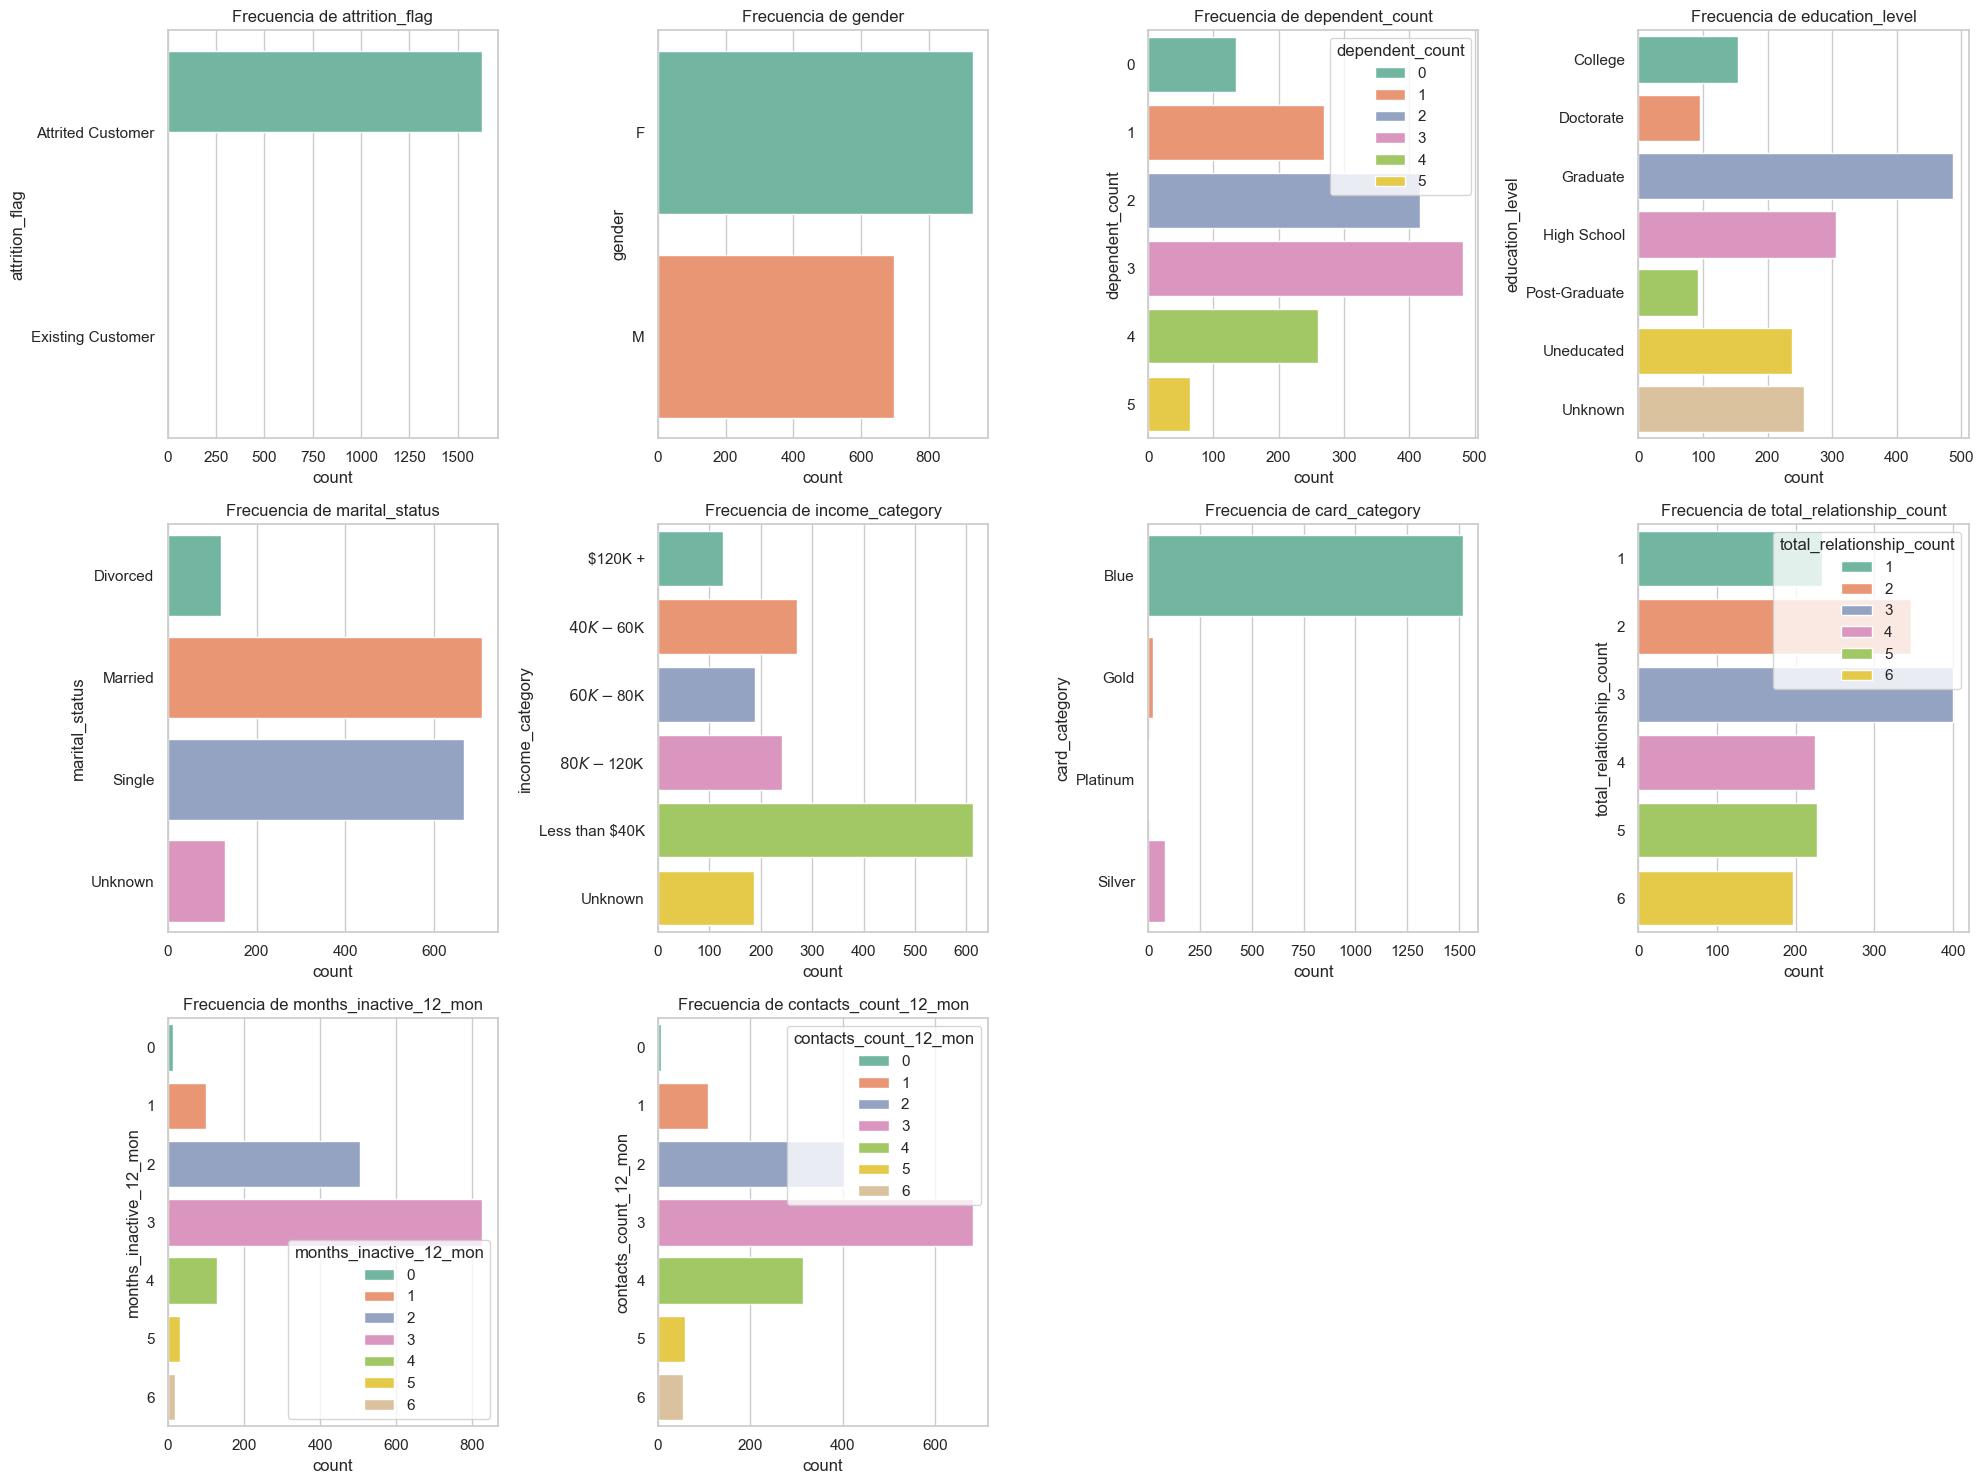

In [7]:
plot_categorical(df_attrited)

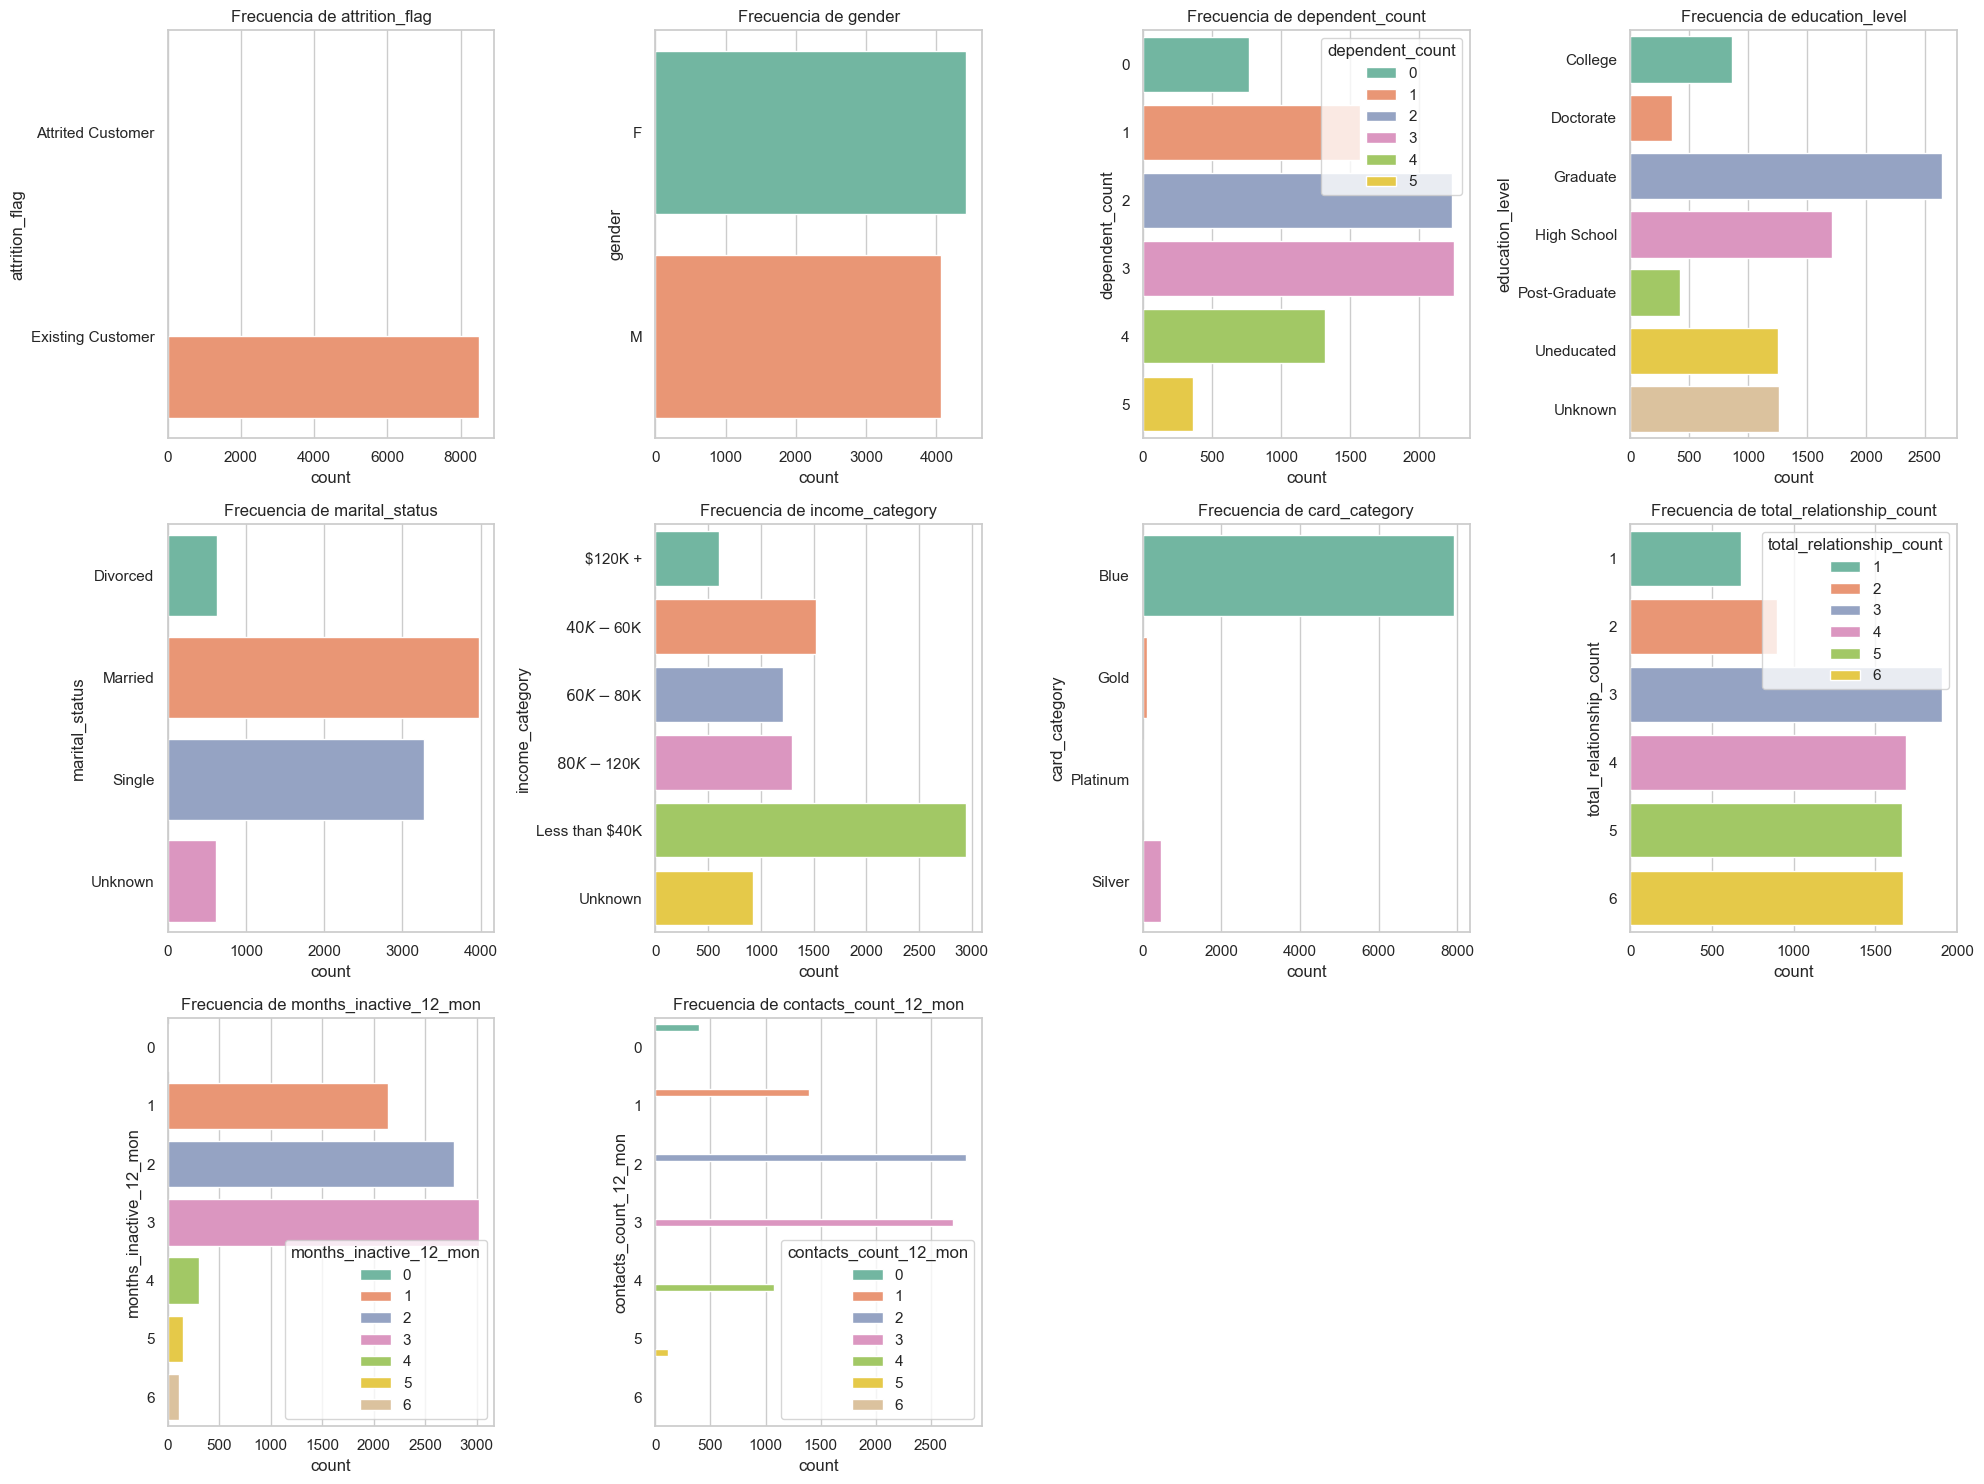

In [8]:
plot_categorical(df_existing)

In [9]:
df_a = df_attrited.copy()
df_a = df_a.drop(columns=['clientnum'])

df_e = df_existing.copy()
df_e = df_e.drop(columns=['clientnum'])

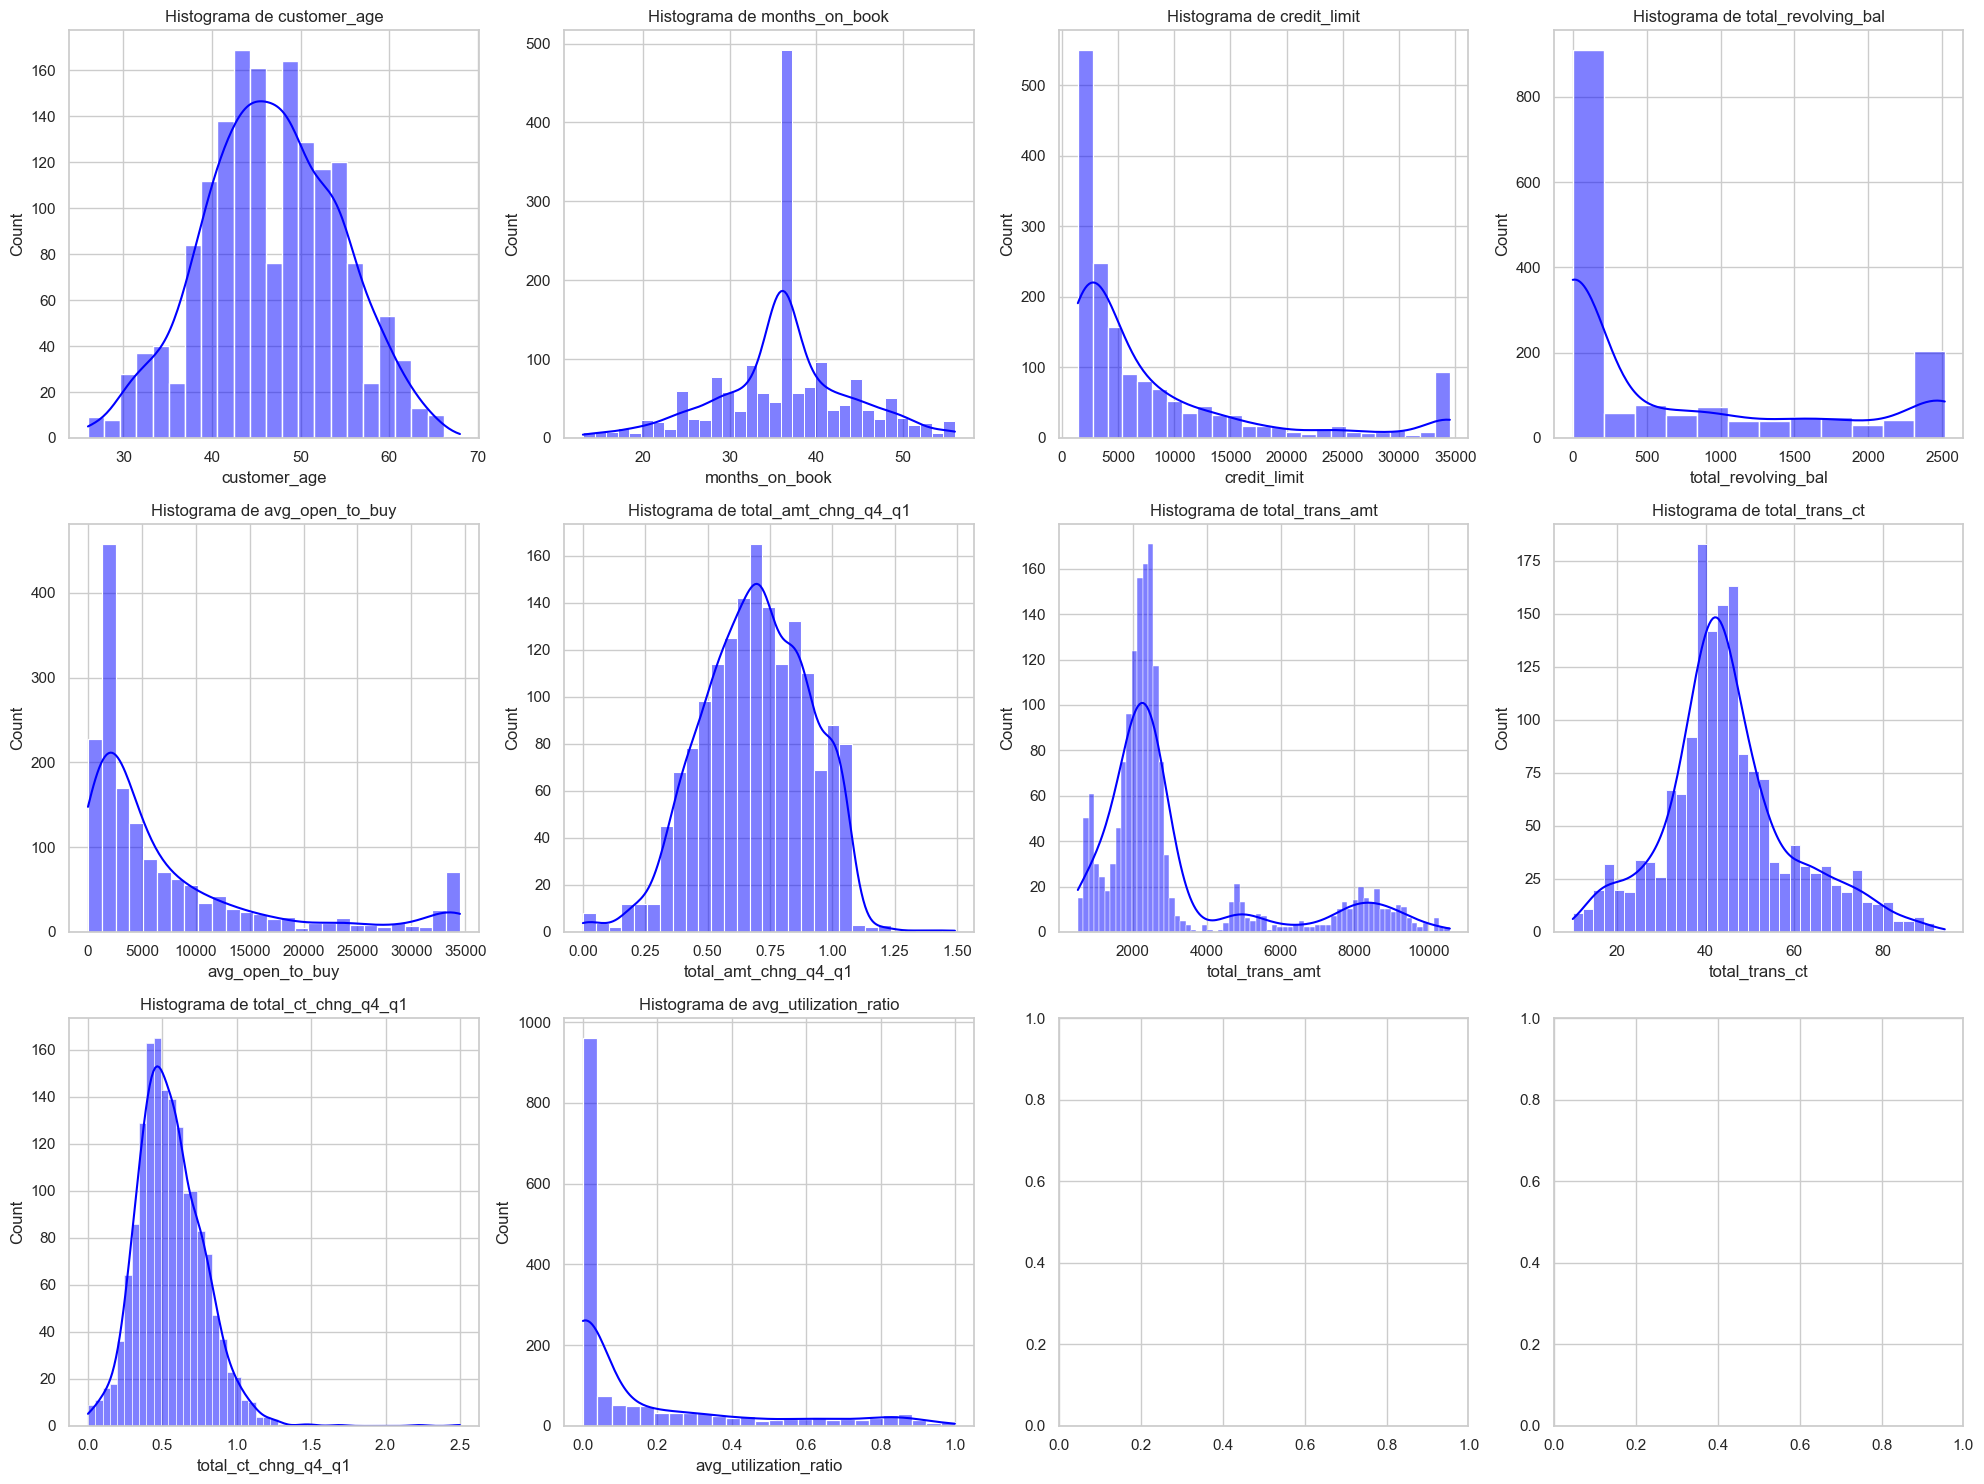

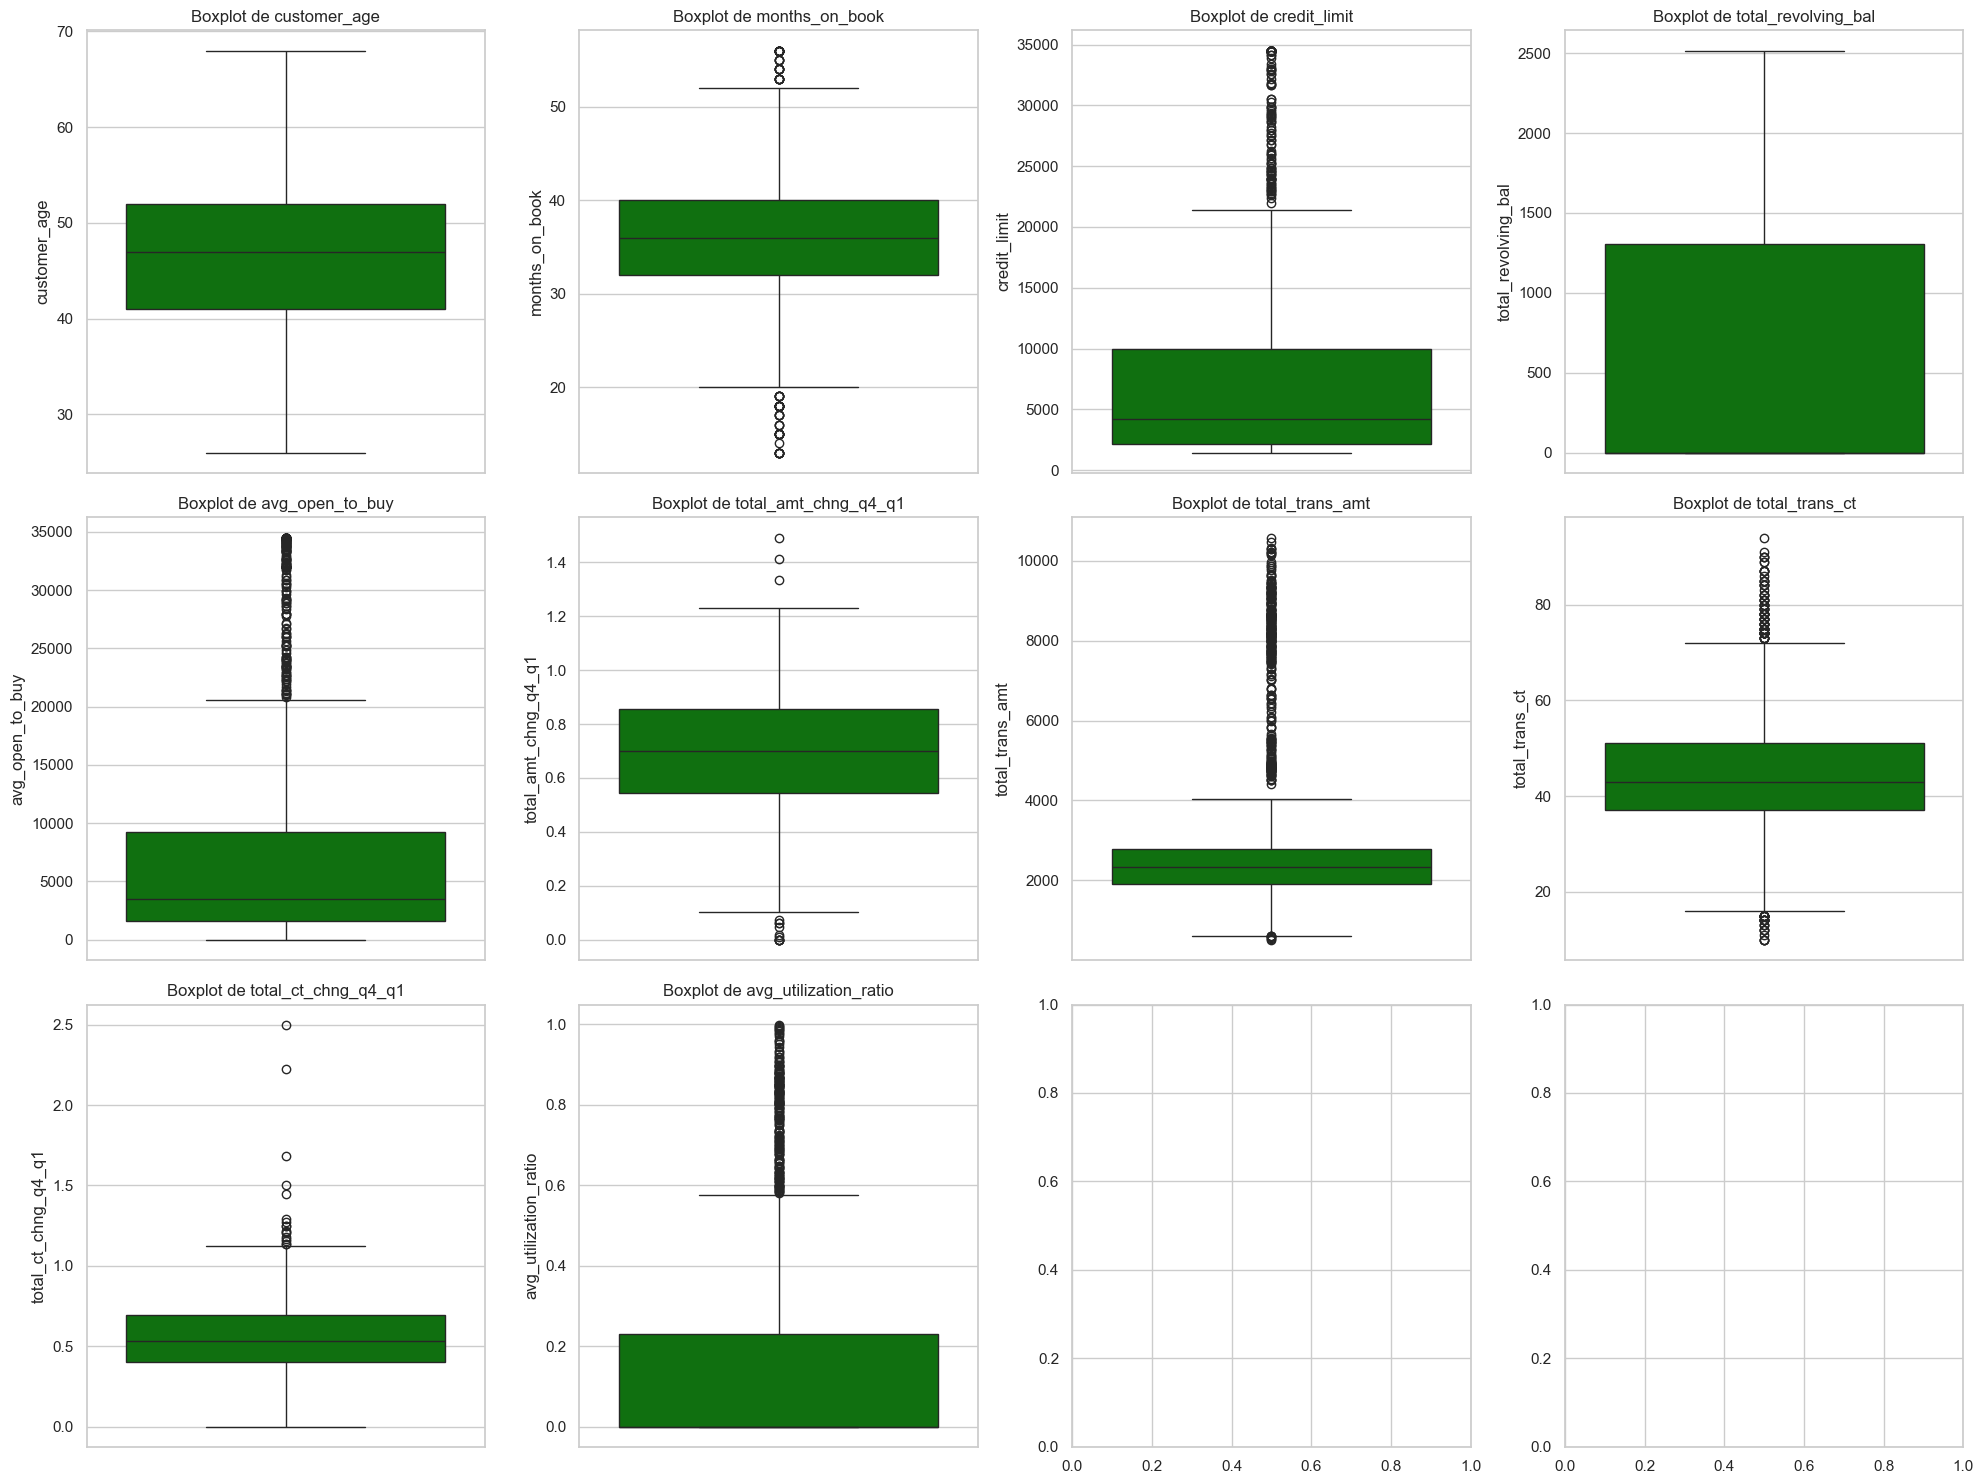

In [10]:
plot_numerical(df_a)

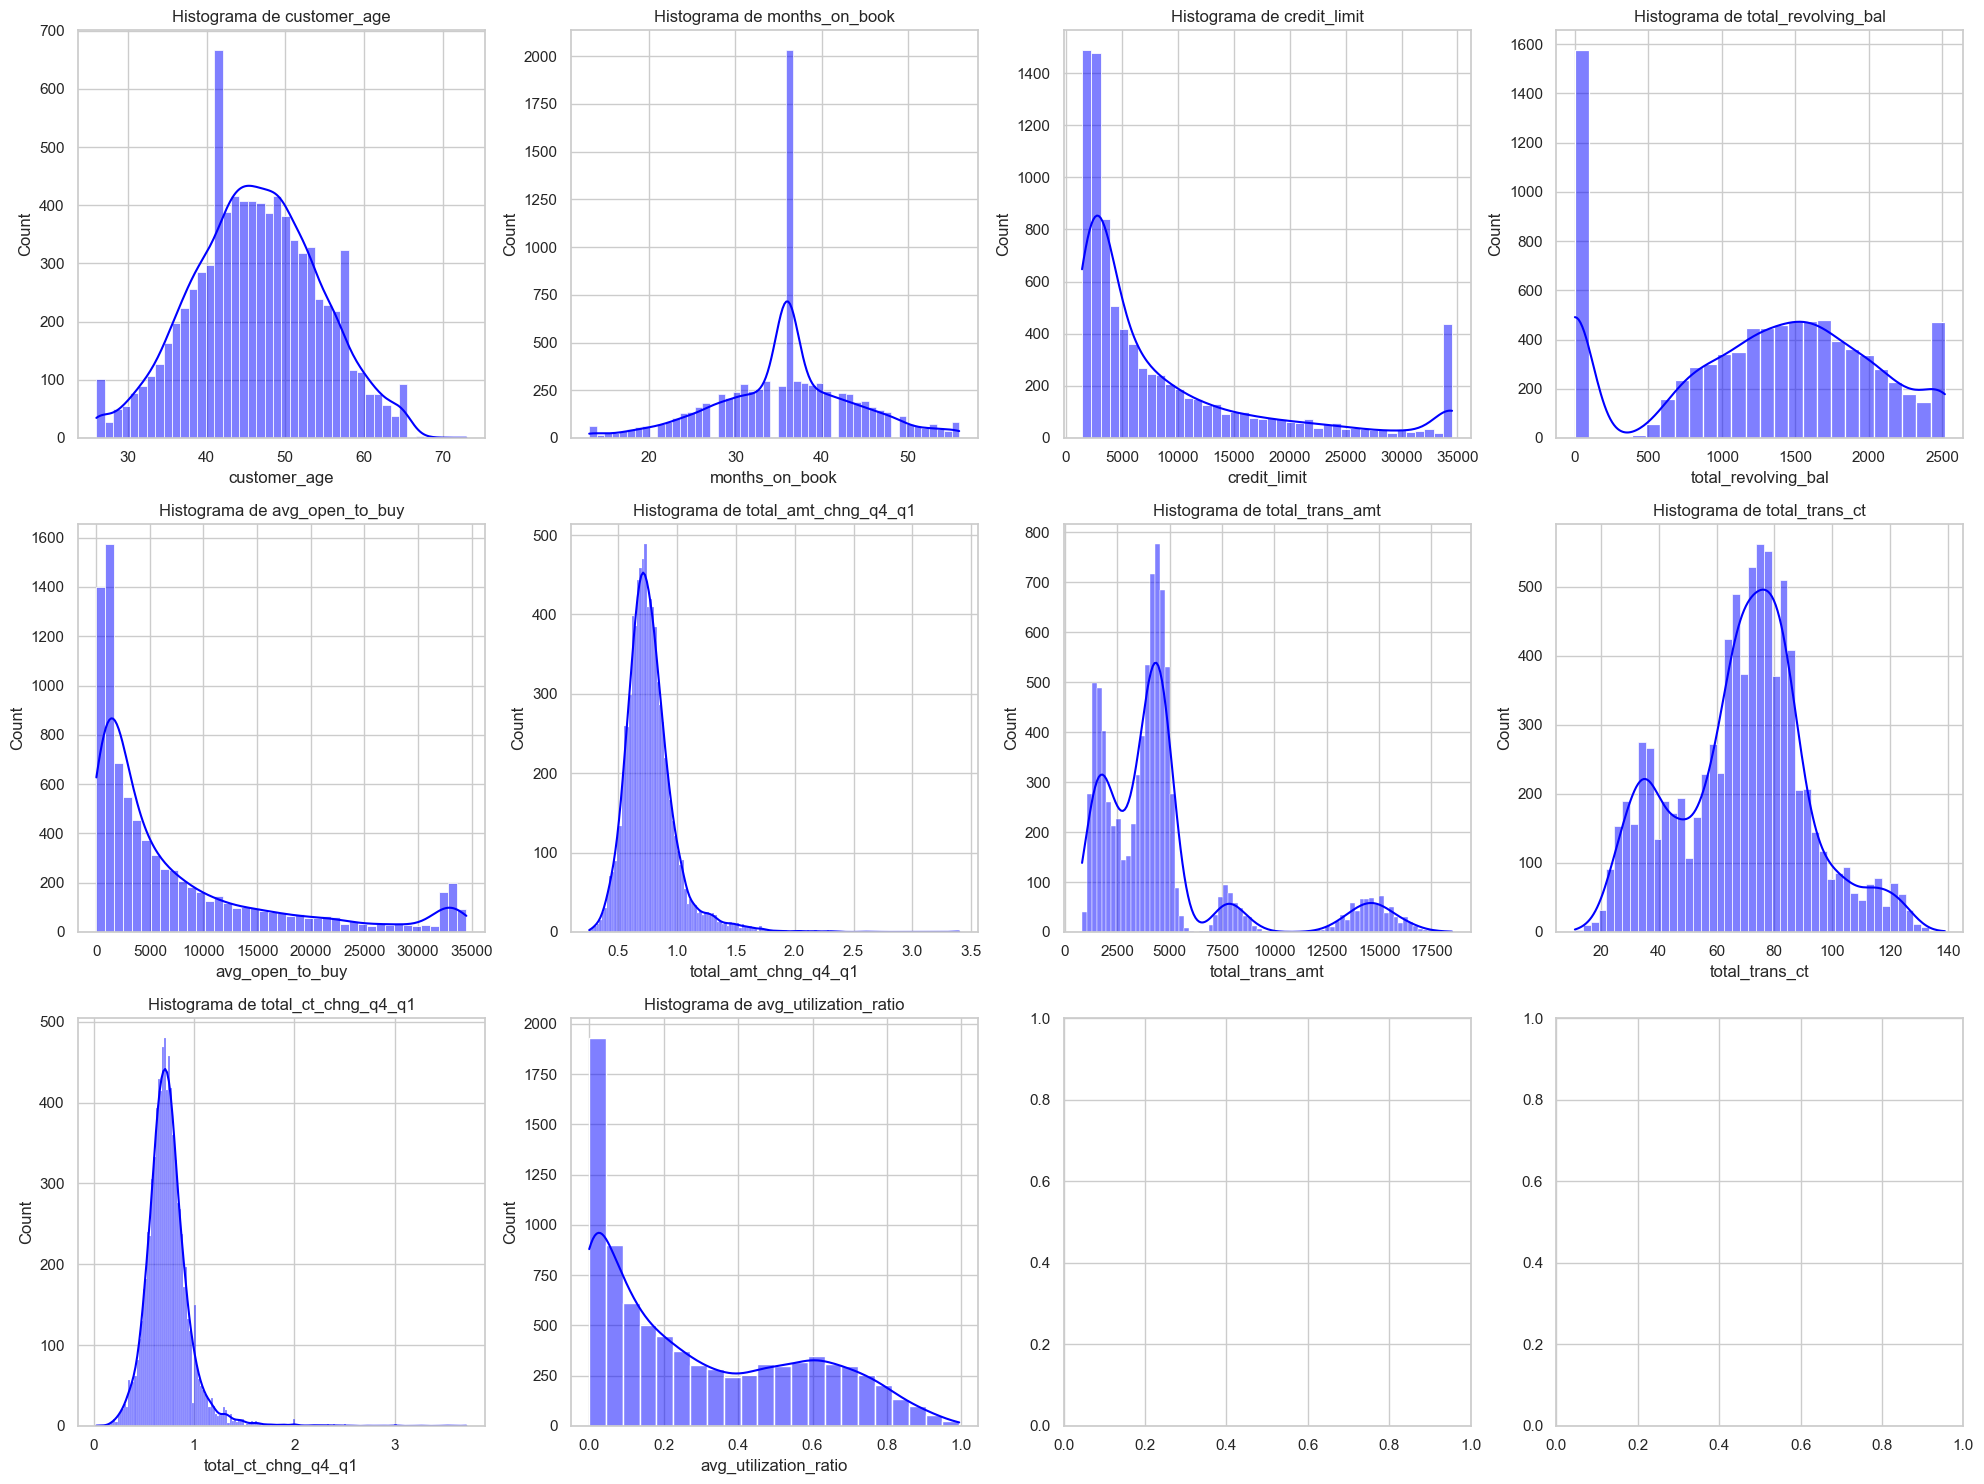

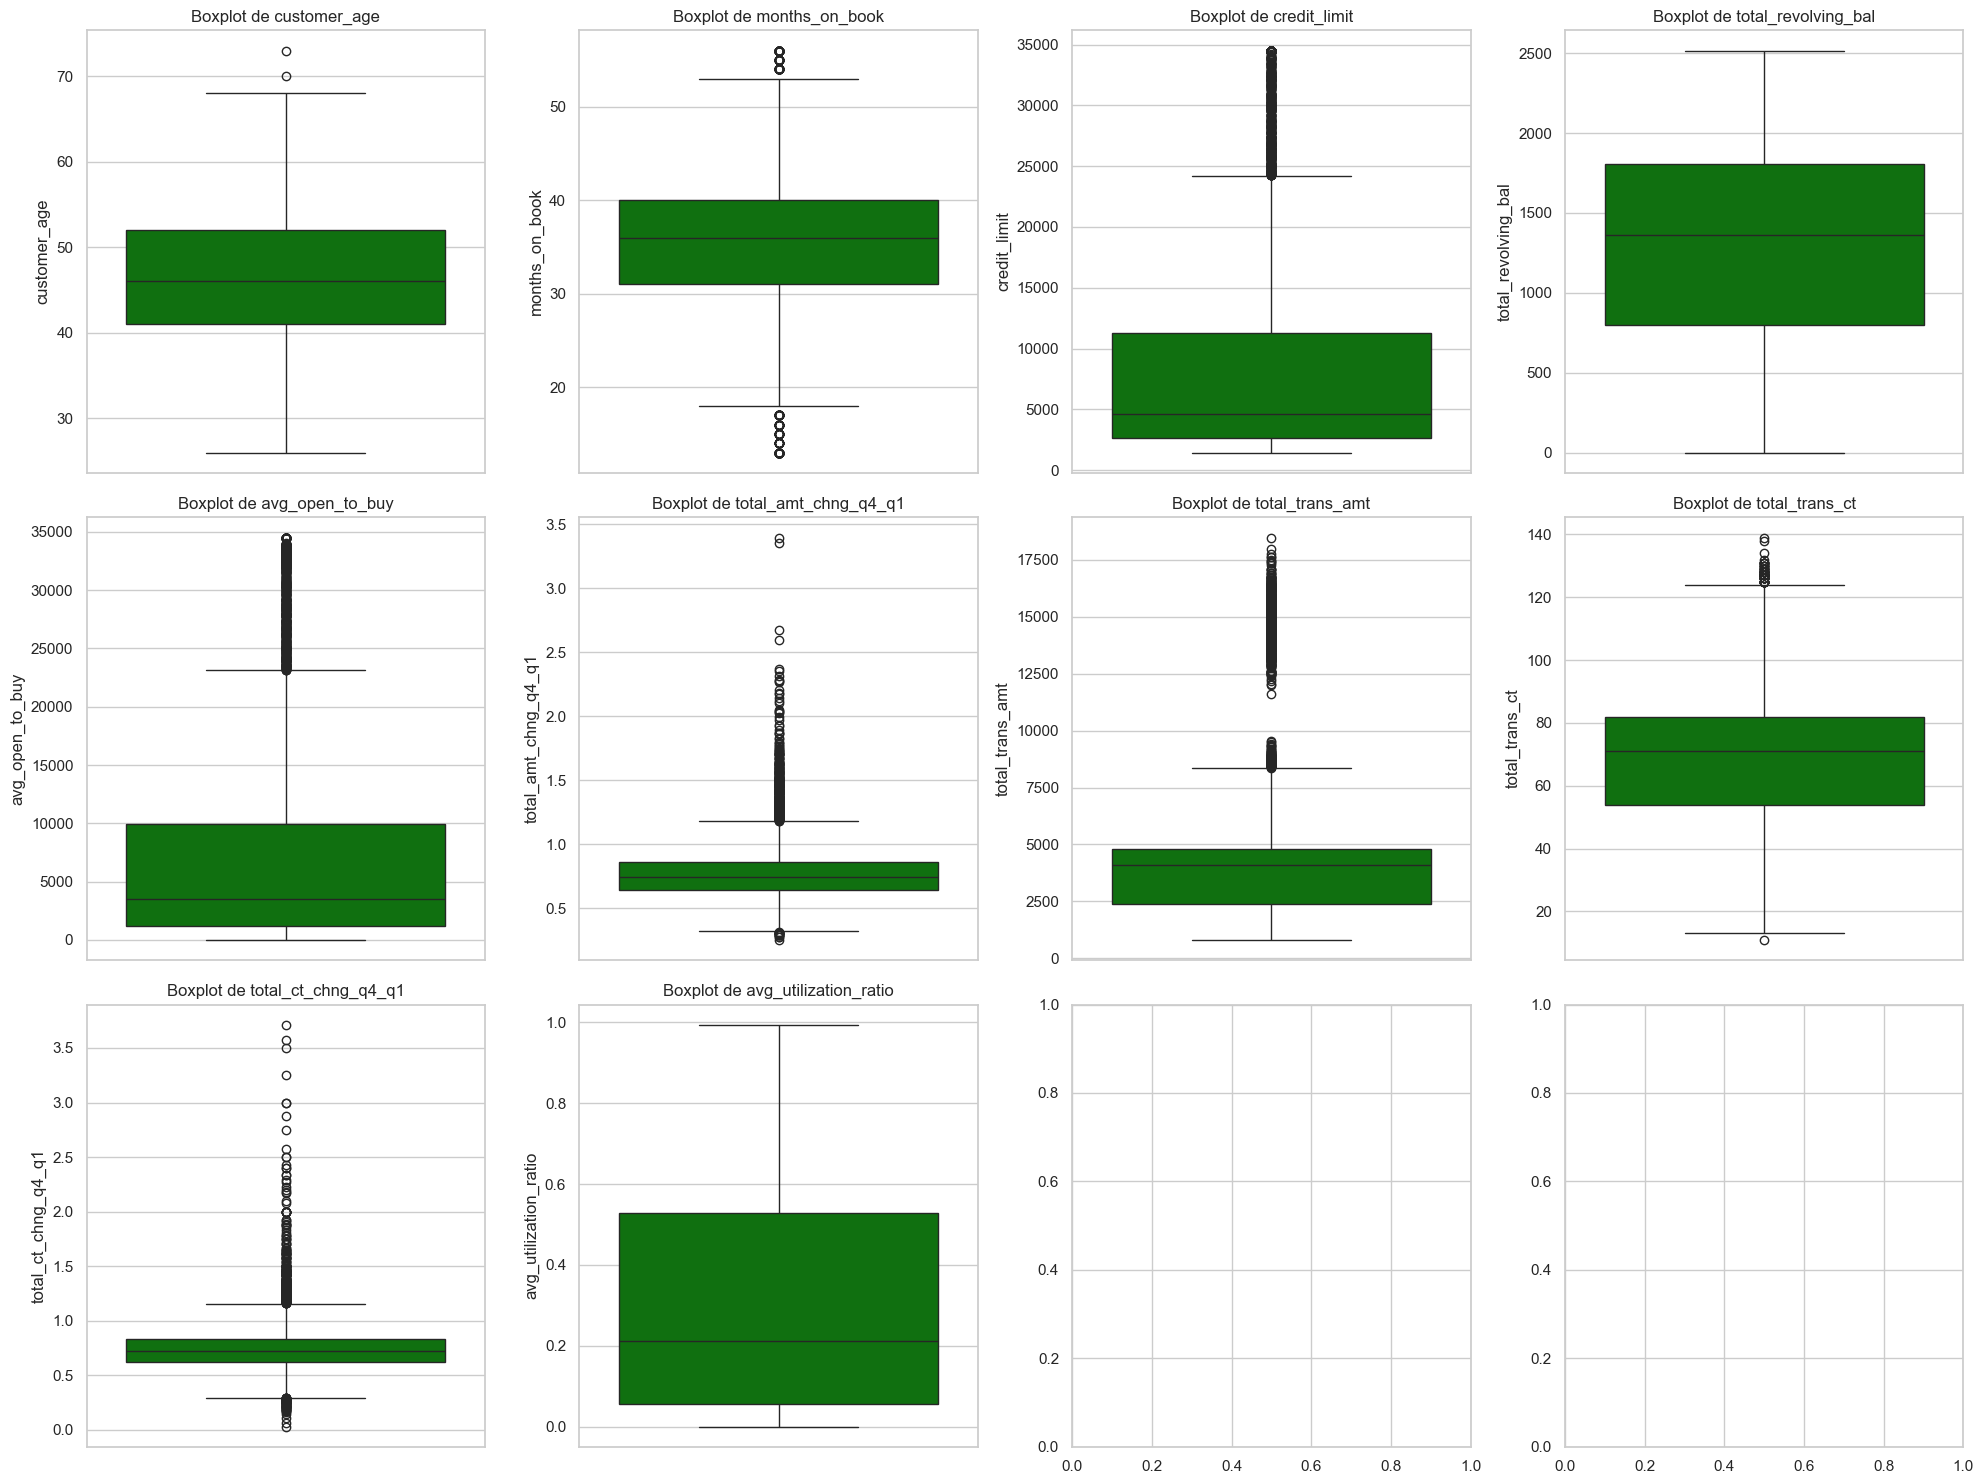

In [11]:
plot_numerical(df_e)

In [12]:
for col in df_attrited.select_dtypes(include=['category','object','bool']).columns:
  print(col)
  print(df_attrited[col].value_counts())
  print('\n')

attrition_flag
attrition_flag
Attrited Customer    1627
Existing Customer       0
Name: count, dtype: int64


gender
gender
F    930
M    697
Name: count, dtype: int64


dependent_count
dependent_count
3    482
2    417
1    269
4    260
0    135
5     64
Name: count, dtype: int64


education_level
education_level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: count, dtype: int64


marital_status
marital_status
Married     709
Single      668
Unknown     129
Divorced    121
Name: count, dtype: int64


income_category
income_category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: count, dtype: int64


card_category
card_category
Blue        1519
Silver        82
Gold          21
Platinum       5
Name: count, dtype: int64


total_relationship_count
total_relationship_count
3    400
2    346
1  

In [13]:
for col in df_existing.select_dtypes(include=['category','object','bool']).columns:
  print(col)
  print(df_existing[col].value_counts())
  print('\n')

attrition_flag
attrition_flag
Existing Customer    8500
Attrited Customer       0
Name: count, dtype: int64


gender
gender
F    4428
M    4072
Name: count, dtype: int64


dependent_count
dependent_count
3    2250
2    2238
1    1569
4    1314
0     769
5     360
Name: count, dtype: int64


education_level
education_level
Graduate         2641
High School      1707
Unknown          1263
Uneducated       1250
College           859
Post-Graduate     424
Doctorate         356
Name: count, dtype: int64


marital_status
marital_status
Married     3978
Single      3275
Divorced     627
Unknown      620
Name: count, dtype: int64


income_category
income_category
Less than $40K    2949
$40K - $60K       1519
$80K - $120K      1293
$60K - $80K       1213
Unknown            925
$120K +            601
Name: count, dtype: int64


card_category
card_category
Blue        7917
Silver       473
Gold          95
Platinum      15
Name: count, dtype: int64


total_relationship_count
total_relationship_co

In [14]:
df_numeric_a = df_a.select_dtypes(include=[np.number])
df_numeric_a.describe()

,customer_age,months_on_book,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,46.659496,36.178242,8136.016595,672.822987,7463.193608,0.694277,3095.025814,44.933620,0.554386,0.162475
std,7.665652,7.796548,9095.350952,921.385582,9109.223674,0.214924,2308.227629,14.568429,0.226854,0.264458
min,26.000000,13.000000,1438.000000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,32.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,47.000000,36.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,52.000000,40.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,68.000000,56.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [15]:
df_numeric_e = df_e.select_dtypes(include=[np.number])
df_numeric_e.describe()

,customer_age,months_on_book,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,46.262118,35.880588,8726.864000,1256.604118,7470.259882,0.772510,4654.655882,68.672588,0.742434,0.296412
std,8.081157,8.021810,9084.980653,757.745354,9087.681322,0.217783,3512.772635,22.919011,0.228054,0.272568
min,26.000000,13.000000,1438.000000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,41.000000,31.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,46.000000,36.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,52.000000,40.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,73.000000,56.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cambiar la variable objetivo a numérica para la visualización
df['attrition_flag'] = df['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})


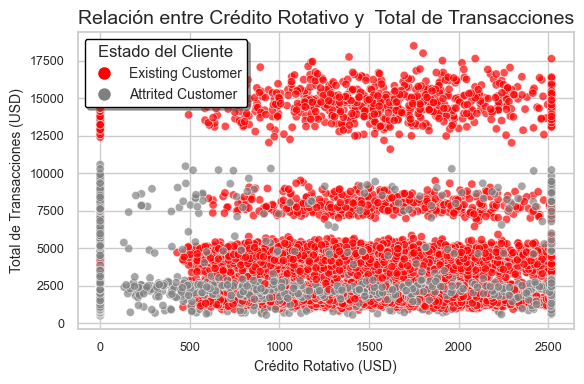

In [17]:
# Definir paleta de colores personalizada
custom_palette = {0: 'red', 1: 'gray'}

plt.figure(figsize=(6, 4))
sns.scatterplot( data=df, x='total_revolving_bal', y='total_trans_amt',
    sizes=(50, 600),  # Se ajusta el rango de tamaños
    hue='attrition_flag',
    palette=custom_palette,
    alpha=0.7,
    legend='full'
)

# También puedes ajustar las etiquetas de los ticks si lo deseas
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejoras en las etiquetas y el título
plt.title('Relación entre Crédito Rotativo y  Total de Transacciones', fontsize=14)
plt.xlabel('Crédito Rotativo (USD)', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Crear la leyenda personalizada
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Existing Customer', 
               markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Attrited Customer', 
               markerfacecolor='gray', markersize=10)
]

plt.legend(
    handles=handles,
    title='Estado del Cliente',
    fontsize=10,
    title_fontsize=12,
    loc='upper left',  # Cambiar la ubicación de la leyenda
    frameon=True,  # Agregar un marco alrededor de la leyenda
    facecolor='white',  # Color de fondo de la leyenda
    edgecolor='black',  # Color del borde de la leyenda
    shadow=True  # Agregar sombra para dar profundidad
)

plt.tight_layout() 
plt.show()

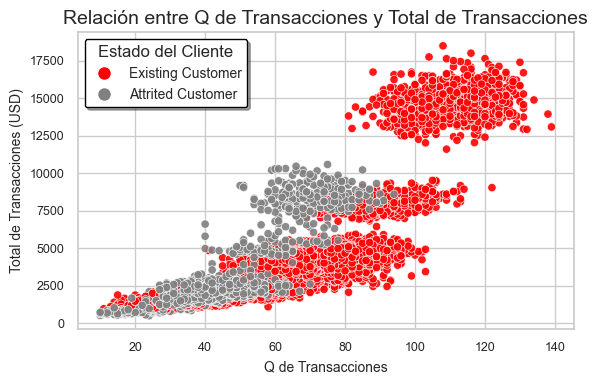

In [18]:
# Definir paleta de colores personalizada
custom_palette = {0: 'red', 1: 'gray'}

plt.figure(figsize=(6, 4))
sns.scatterplot( data=df, x='total_trans_ct', y='total_trans_amt',
    sizes=(50, 600),  # Se ajusta el rango de tamaños
    hue='attrition_flag',
    palette=custom_palette,
    alpha=0.9,
    legend='full'
)

# También puedes ajustar las etiquetas de los ticks si lo deseas
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejoras en las etiquetas y el título
plt.title('Relación entre Q de Transacciones y Total de Transacciones', fontsize=14)
plt.xlabel('Q de Transacciones', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Crear la leyenda personalizada
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Existing Customer', 
               markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Attrited Customer', 
               markerfacecolor='gray', markersize=10)
]

plt.legend(
    handles=handles,
    title='Estado del Cliente',
    fontsize=10,
    title_fontsize=12,
    loc='upper left',  # Cambiar la ubicación de la leyenda
    frameon=True,  # Agregar un marco alrededor de la leyenda
    facecolor='white',  # Color de fondo de la leyenda
    edgecolor='black',  # Color del borde de la leyenda
    shadow=True  # Agregar sombra para dar profundidad
)

plt.tight_layout() 
plt.show()

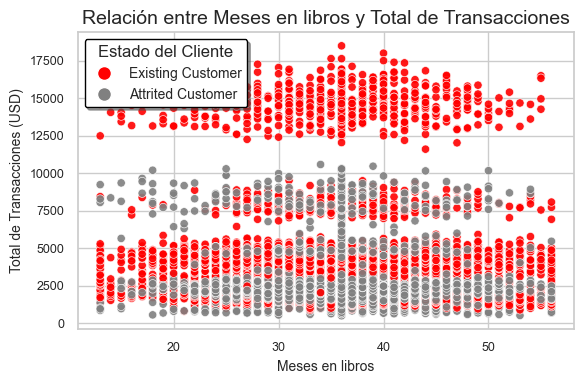

In [19]:
# Definir paleta de colores personalizada
custom_palette = {0: 'red', 1: 'gray'}

plt.figure(figsize=(6, 4))
sns.scatterplot( data=df, x='months_on_book', y='total_trans_amt',
    sizes=(50, 600),  # Se ajusta el rango de tamaños
    hue='attrition_flag',
    palette=custom_palette,
    alpha=0.9,
    legend='full'
)

# También puedes ajustar las etiquetas de los ticks si lo deseas
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejoras en las etiquetas y el título
plt.title('Relación entre Meses en libros y Total de Transacciones', fontsize=14)
plt.xlabel('Meses en libros', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Crear la leyenda personalizada
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Existing Customer', 
               markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Attrited Customer', 
               markerfacecolor='gray', markersize=10)
]

plt.legend(
    handles=handles,
    title='Estado del Cliente',
    fontsize=10,
    title_fontsize=12,
    loc='upper left',  # Cambiar la ubicación de la leyenda
    frameon=True,  # Agregar un marco alrededor de la leyenda
    facecolor='white',  # Color de fondo de la leyenda
    edgecolor='black',  # Color del borde de la leyenda
    shadow=True  # Agregar sombra para dar profundidad
)

plt.tight_layout() 
plt.show()

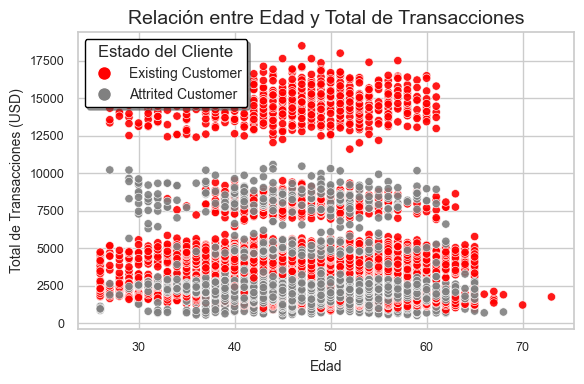

In [20]:
# Definir paleta de colores personalizada
custom_palette = {0: 'red', 1: 'gray'}

plt.figure(figsize=(6, 4))
sns.scatterplot( data=df, x='customer_age', y='total_trans_amt',
    sizes=(50, 600),  # Se ajusta el rango de tamaños
    hue='attrition_flag',
    palette=custom_palette,
    alpha=0.9,
    legend='full'
)

# También puedes ajustar las etiquetas de los ticks si lo deseas
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejoras en las etiquetas y el título
plt.title('Relación entre Edad y Total de Transacciones', fontsize=14)
plt.xlabel('Edad', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Crear la leyenda personalizada
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Existing Customer', 
               markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Attrited Customer', 
               markerfacecolor='gray', markersize=10)
]

plt.legend(
    handles=handles,
    title='Estado del Cliente',
    fontsize=10,
    title_fontsize=12,
    loc='upper left',  # Cambiar la ubicación de la leyenda
    frameon=True,  # Agregar un marco alrededor de la leyenda
    facecolor='white',  # Color de fondo de la leyenda
    edgecolor='black',  # Color del borde de la leyenda
    shadow=True  # Agregar sombra para dar profundidad
)

plt.tight_layout() 
plt.show()

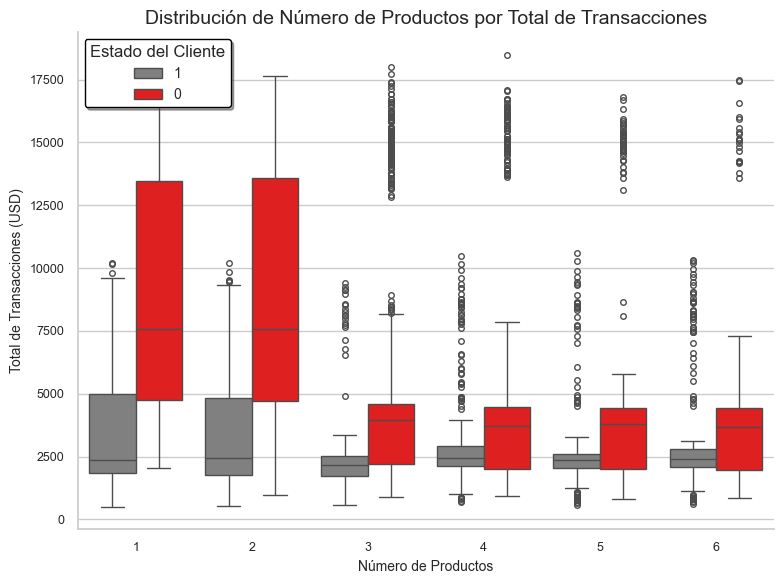

In [21]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='total_relationship_count', y='total_trans_amt', hue='attrition_flag',
            palette=custom_palette, legend='full', fliersize=4)

# Mejoras en las etiquetas y el título
plt.title('Distribución de Número de Productos por Total de Transacciones', fontsize=14)
plt.xlabel('Número de Productos', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Ajustar las etiquetas de los ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente', fontsize=10, title_fontsize=12,
           loc='upper left', frameon=True, facecolor='white', edgecolor='black', shadow=True)

# Mejorar la estética general
sns.despine()

# Ajustar el espaciado
plt.tight_layout()
plt.show()

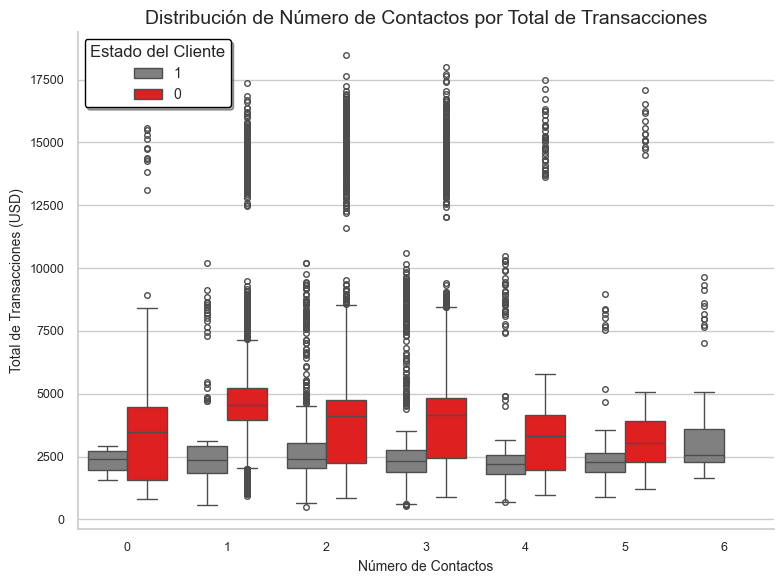

In [22]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='contacts_count_12_mon', y='total_trans_amt', hue='attrition_flag',
            palette=custom_palette, legend='full', fliersize=4)  # Ajustar el tamaño de los outliers

# Mejoras en las etiquetas y el título
plt.title('Distribución de Número de Contactos por Total de Transacciones', fontsize=14)
plt.xlabel('Número de Contactos', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Ajustar las etiquetas de los ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente', fontsize=10, title_fontsize=12,
           loc='upper left', frameon=True, facecolor='white', edgecolor='black', shadow=True)

# Mejorar la estética general
sns.despine()

# Ajustar el espaciado
plt.tight_layout()
plt.show()



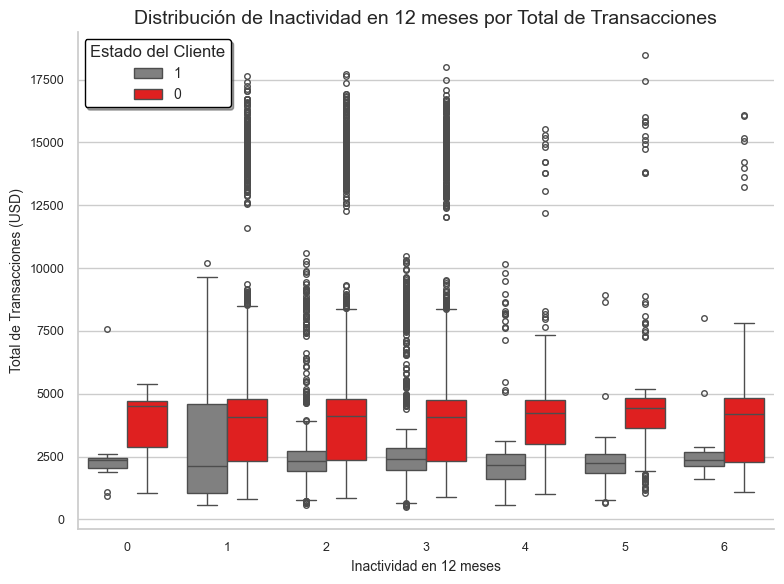

In [23]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='months_inactive_12_mon', y='total_trans_amt', hue='attrition_flag',
            palette=custom_palette, legend='full', fliersize=4)  # Ajustar el tamaño de los outliers

# Mejoras en las etiquetas y el título
plt.title('Distribución de Inactividad en 12 meses por Total de Transacciones', fontsize=14)
plt.xlabel('Inactividad en 12 meses', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Ajustar las etiquetas de los ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente', fontsize=10, title_fontsize=12,
           loc='upper left', frameon=True, facecolor='white', edgecolor='black', shadow=True)

# Mejorar la estética general
sns.despine()

# Ajustar el espaciado
plt.tight_layout()
plt.show()


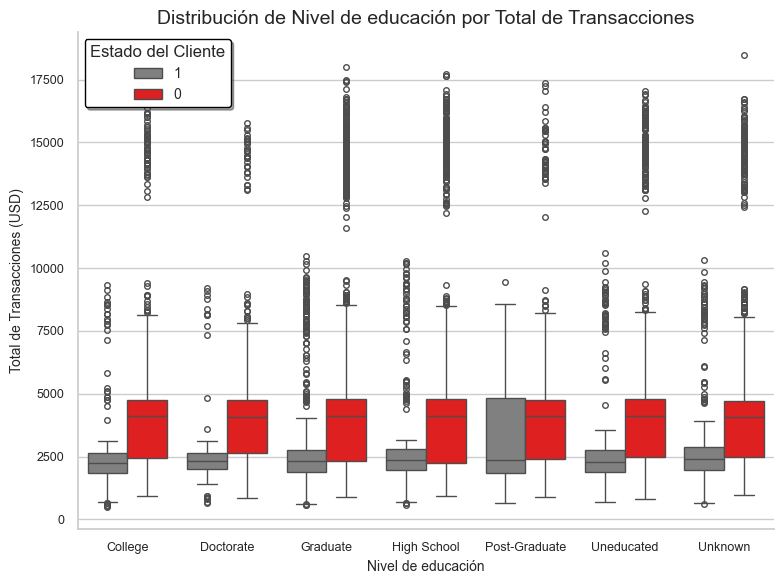

In [24]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='education_level', y='total_trans_amt', hue='attrition_flag',
            palette=custom_palette, legend='full', fliersize=4)  # Ajustar el tamaño de los outliers

# Mejoras en las etiquetas y el título
plt.title('Distribución de Nivel de educación por Total de Transacciones', fontsize=14)
plt.xlabel('Nivel de educación', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Ajustar las etiquetas de los ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente', fontsize=10, title_fontsize=12,
           loc='upper left', frameon=True, facecolor='white', edgecolor='black', shadow=True)

# Mejorar la estética general
sns.despine()

# Ajustar el espaciado
plt.tight_layout()
plt.show()

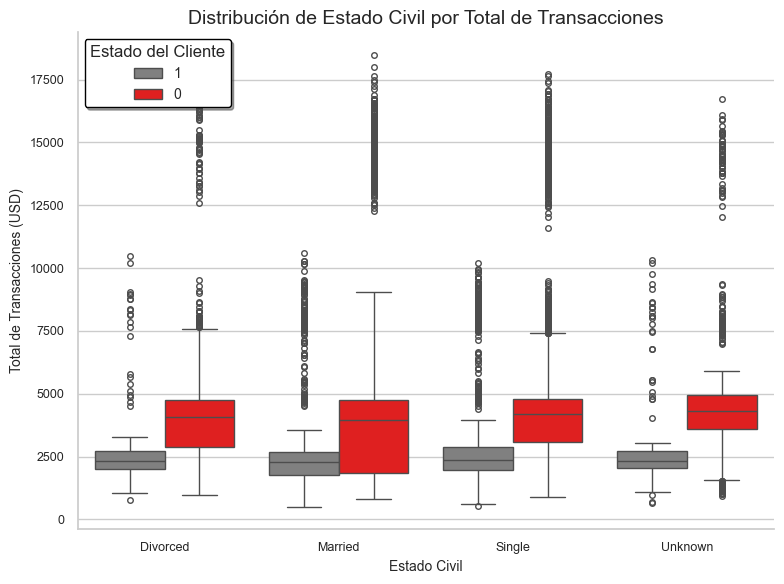

In [25]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='marital_status', y='total_trans_amt', hue='attrition_flag',
            palette=custom_palette, legend='full', fliersize=4)  # Ajustar el tamaño de los outliers

# Mejoras en las etiquetas y el título
plt.title('Distribución de Estado Civil por Total de Transacciones', fontsize=14)
plt.xlabel('Estado Civil', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Ajustar las etiquetas de los ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente', fontsize=10, title_fontsize=12,
           loc='upper left', frameon=True, facecolor='white', edgecolor='black', shadow=True)

# Mejorar la estética general
sns.despine()

# Ajustar el espaciado
plt.tight_layout()
plt.show()

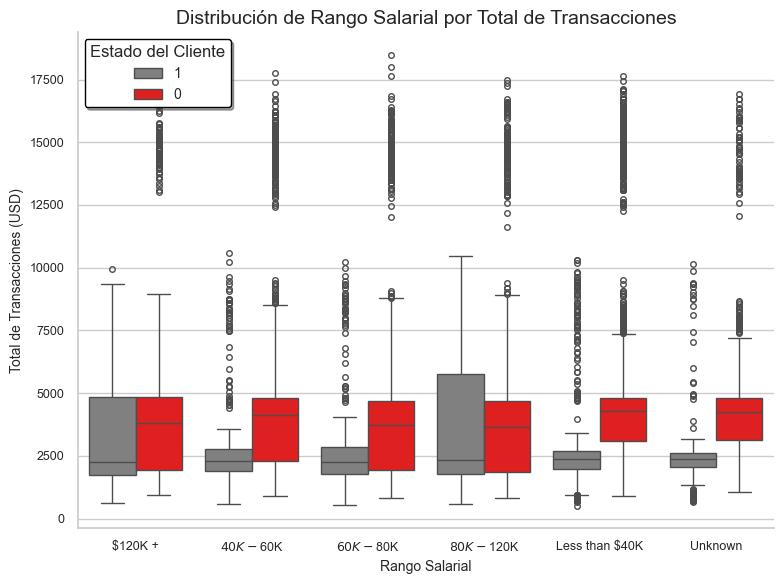

In [26]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income_category', y='total_trans_amt', hue='attrition_flag',
            palette=custom_palette, legend='full', fliersize=4)  # Ajustar el tamaño de los outliers

# Mejoras en las etiquetas y el título
plt.title('Distribución de Rango Salarial por Total de Transacciones', fontsize=14)
plt.xlabel('Rango Salarial', fontsize=10)
plt.ylabel('Total de Transacciones (USD)', fontsize=10)

# Ajustar las etiquetas de los ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente', fontsize=10, title_fontsize=12,
           loc='upper left', frameon=True, facecolor='white', edgecolor='black', shadow=True)

# Mejorar la estética general
sns.despine()

# Ajustar el espaciado
plt.tight_layout()
plt.show()